In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
# Add your API key from Quandl
quandl.ApiConfig.api_key = ''

In [3]:
all_stock = quandl.get('NIKKEI/ALL_STOCK', start_date='2006-01-01', end_date='2018-07-09')

In [4]:
x = all_stock.index
y = all_stock['Close']

In [5]:
ts = pd.Series(y, index=x)

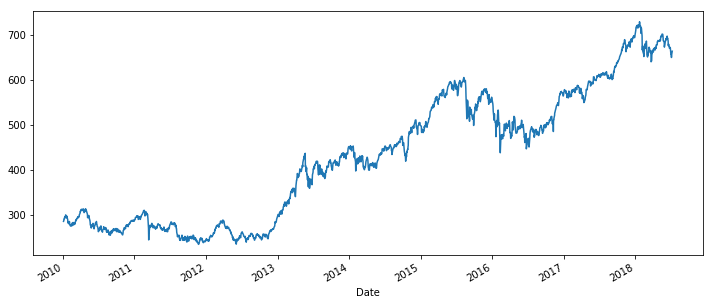

In [6]:
ts.plot(figsize=(12,5))

/anaconda/envs/python_finance/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


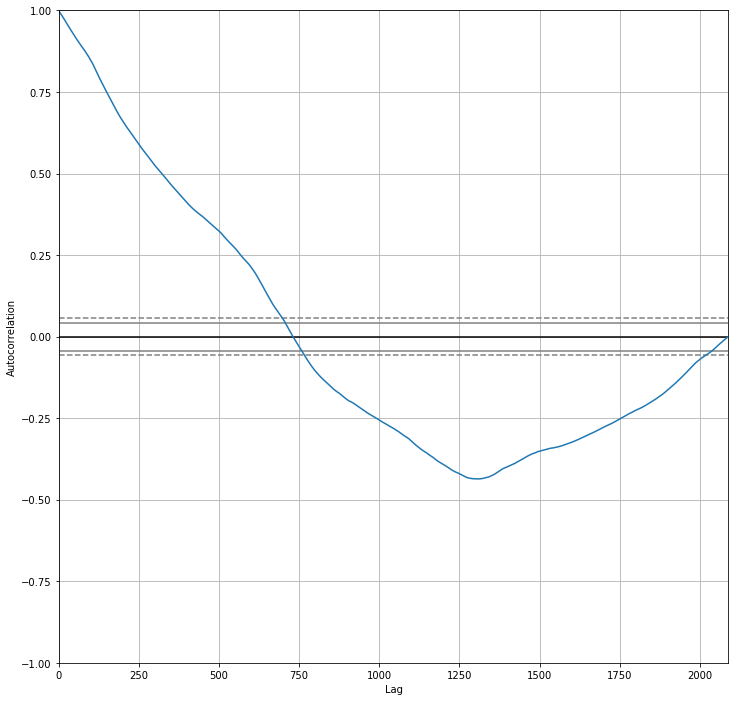

In [7]:
plt.figure(figsize = (12,12))
autocorrelation = pd.tools.plotting.autocorrelation_plot(ts)

In [8]:
from statsmodels.tsa.arima_model import ARIMA

/anaconda/envs/python_finance/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
# fit the timeseries for NIKKEI
model = ARIMA(ts, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2088
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6407.173
Method:                       css-mle   S.D. of innovations              5.205
Date:                Mon, 09 Jul 2018   AIC                          12828.347
Time:                        23:17:07   BIC                          12867.855
Sample:                    01-05-2010   HQIC                         12842.822
                         - 07-09-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1816      0.109      1.673      0.095      -0.031       0.394
ar.L1.D.Close     0.0263      0.022      1.202      0.229      -0.017       0.069
ar.L2.D.Close    -0.0046      0.022     

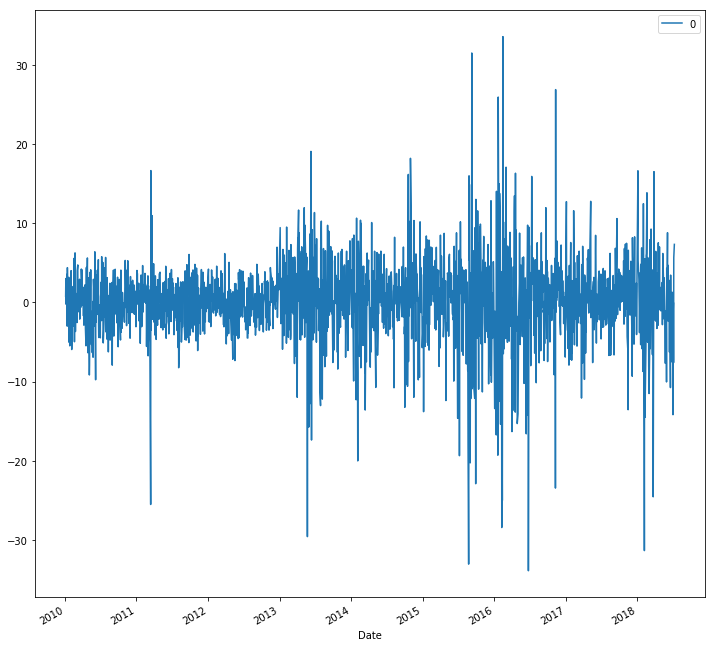

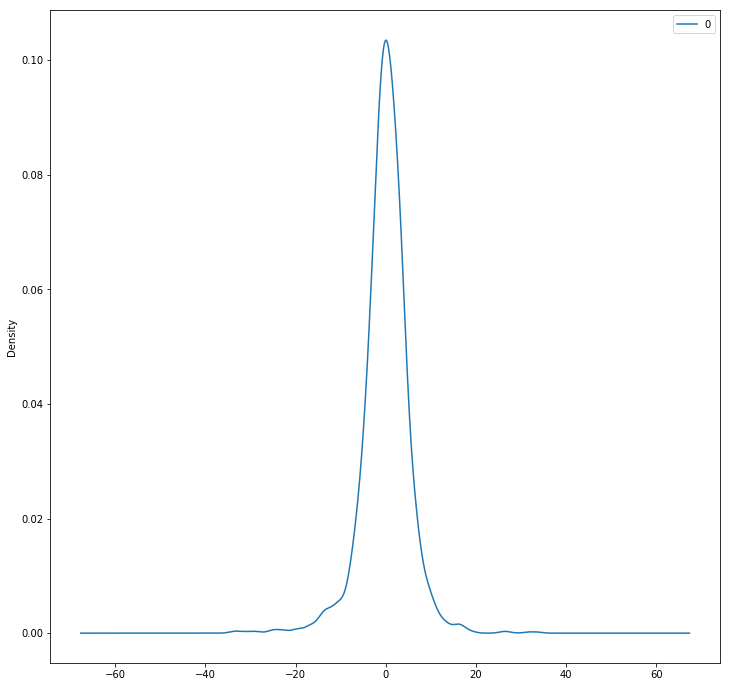

In [10]:
# plot the residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(12,12))
residuals.plot(kind='kde', figsize=(12,12))

## Rolling Forecast ARIMA Model

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
size = int(len(ts) * 0.66)

In [13]:
print(size)

1378


In [14]:
train, test = ts[0:size], ts[size:len(ts)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=596.593463, expected=597.810000
predicted=597.425546, expected=596.710000
predicted=597.430031, expected=599.740000
predicted=600.679392, expected=599.240000
predicted=599.124932, expected=590.820000
predicted=590.747359, expected=582.250000
predicted=581.376047, expected=564.230000
predicted=563.484701, expected=531.220000
predicted=528.773193, expected=513.860000
predicted=510.631659, expected=530.650000
predicted=533.366721, expected=538.430000
predicted=542.817716, expected=555.510000
predicted=557.656451, expected=551.620000
predicted=549.411364, expected=530.490000
predicted=527.979079, expected=526.310000
predicted=523.831635, expected=529.680000
predicted=532.428101, expected=518.640000
predicted=520.350555, expected=518.670000
predicted=517.724771, expected=508.320000
predicted=507.330246, expected=539.970000
predicted=543.472841, expected=530.560000
predicted=531.621396, expected=531.310000
predicted=530.633392, expected=524.880000
predicted=521.504326, expected=524

predicted=496.460397, expected=494.800000
predicted=495.641385, expected=497.550000
predicted=498.188838, expected=501.270000
predicted=501.373102, expected=496.630000
predicted=496.660391, expected=494.270000
predicted=493.992113, expected=477.610000
predicted=477.108612, expected=472.290000
predicted=472.431309, expected=474.200000
predicted=474.989841, expected=460.830000
predicted=461.525396, expected=464.070000
predicted=464.151668, expected=474.340000
predicted=475.078852, expected=479.580000
predicted=480.684548, expected=476.180000
predicted=475.591867, expected=480.910000
predicted=480.481426, expected=446.790000
predicted=445.679910, expected=455.460000
predicted=455.459477, expected=455.960000
predicted=457.015553, expected=464.210000
predicted=466.354028, expected=463.700000
predicted=463.147102, expected=467.310000
predicted=467.181631, expected=470.260000
predicted=470.039737, expected=468.070000
predicted=468.100023, expected=460.110000
predicted=459.665790, expected=457

predicted=572.134075, expected=577.140000
predicted=577.897398, expected=570.210000
predicted=571.072772, expected=577.760000
predicted=577.722561, expected=581.840000
predicted=582.127056, expected=576.400000
predicted=576.716424, expected=571.250000
predicted=570.695580, expected=573.250000
predicted=573.318029, expected=568.290000
predicted=568.934470, expected=568.110000
predicted=568.461563, expected=558.750000
predicted=558.877529, expected=562.250000
predicted=562.607070, expected=565.580000
predicted=566.201948, expected=563.580000
predicted=564.199036, expected=557.570000
predicted=557.331244, expected=553.710000
predicted=553.619083, expected=550.020000
predicted=550.412668, expected=552.830000
predicted=553.466757, expected=555.380000
predicted=555.982844, expected=555.830000
predicted=556.148985, expected=556.080000
predicted=555.996179, expected=561.670000
predicted=561.735241, expected=566.910000
predicted=567.183708, expected=572.620000
predicted=572.720761, expected=579

predicted=720.336860, expected=716.590000
predicted=716.496277, expected=719.630000
predicted=719.852499, expected=723.690000
predicted=724.248662, expected=722.300000
predicted=722.682678, expected=717.170000
predicted=717.008447, expected=721.820000
predicted=721.888352, expected=723.070000
predicted=723.616390, expected=730.380000
predicted=730.872653, expected=727.350000
predicted=727.345798, expected=721.370000
predicted=721.137756, expected=719.870000
predicted=719.720207, expected=720.480000
predicted=721.069936, expected=712.280000
predicted=712.768874, expected=704.500000
predicted=704.572412, expected=717.050000
predicted=717.662057, expected=714.750000
predicted=715.764288, expected=699.110000
predicted=699.114268, expected=667.480000
predicted=666.266157, expected=670.140000
predicted=670.932594, expected=676.630000
predicted=678.985643, expected=664.070000
predicted=665.168632, expected=658.400000
predicted=658.015061, expected=652.740000
predicted=652.970625, expected=658

In [45]:
forecast = list()
i = 0

for i in range(len(predictions)):
    forecast.append(predictions[i][0])
    i += 1

In [46]:
# Gave me a bit of trouble in all seriousness.. but just note that we can create index by itself and columns as its own while adding the list
graph_predictions = pd.DataFrame(forecast, index=test.index, columns=['Close'])

In [48]:
graph_predictions.head()

,Close
Date,
2015-08-13,596.593463
2015-08-14,597.425546
2015-08-17,597.430031
2015-08-18,600.679392
2015-08-19,599.124932


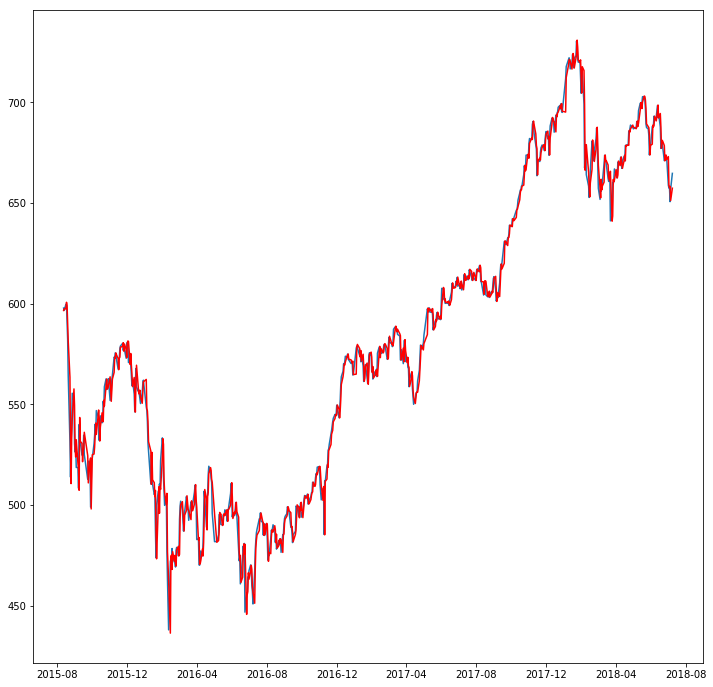

In [50]:
plt.figure(figsize=(12,12))
plt.plot(test)
plt.plot(graph_predictions, color='red')